# Import Packages

In [2]:

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [3]:
class_names = ['glaucoma',"normal","cataract","diabetic_retinopathy","hypertension"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150,150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [5]:
def load_data():

    datasets = [r'C:\Users\shren\Downloads\retinal imagening-mgit\train', r'C:\Users\shren\Downloads\retinal imagening-mgit\test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\shren\Downloads\retinal imagening-mgit\train


100%|██████████| 99/99 [00:00<00:00, 397.16it/s]


Loading C:\Users\shren\Downloads\retinal imagening-mgit\test


100%|██████████| 99/99 [00:00<00:00, 391.24it/s]


In [7]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [8]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1045
Number of testing examples: 1045
Each image is of size: (150, 150)


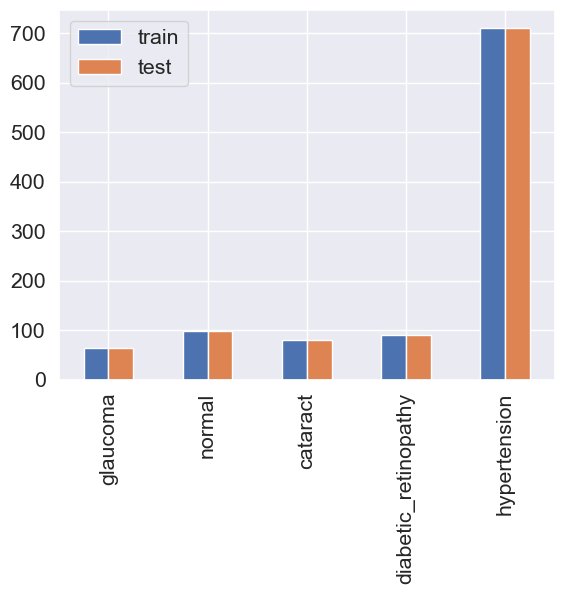

In [9]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

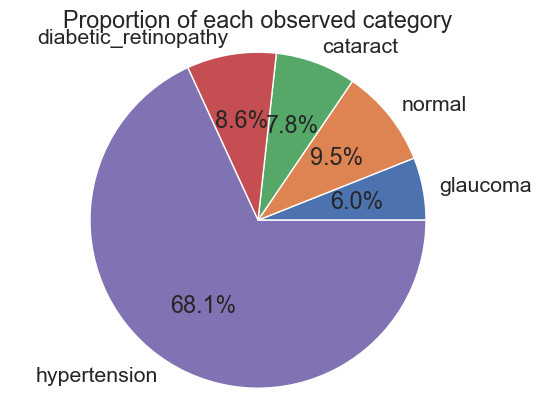

In [10]:
plt.pie(train_counts,
        explode=(0,0,0,0,0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [13]:
def display_random_image(class_names, images, labels):

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

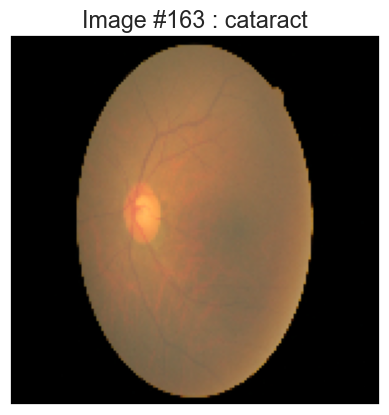

In [14]:
display_random_image(class_names, train_images, train_labels)

In [15]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels):

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()


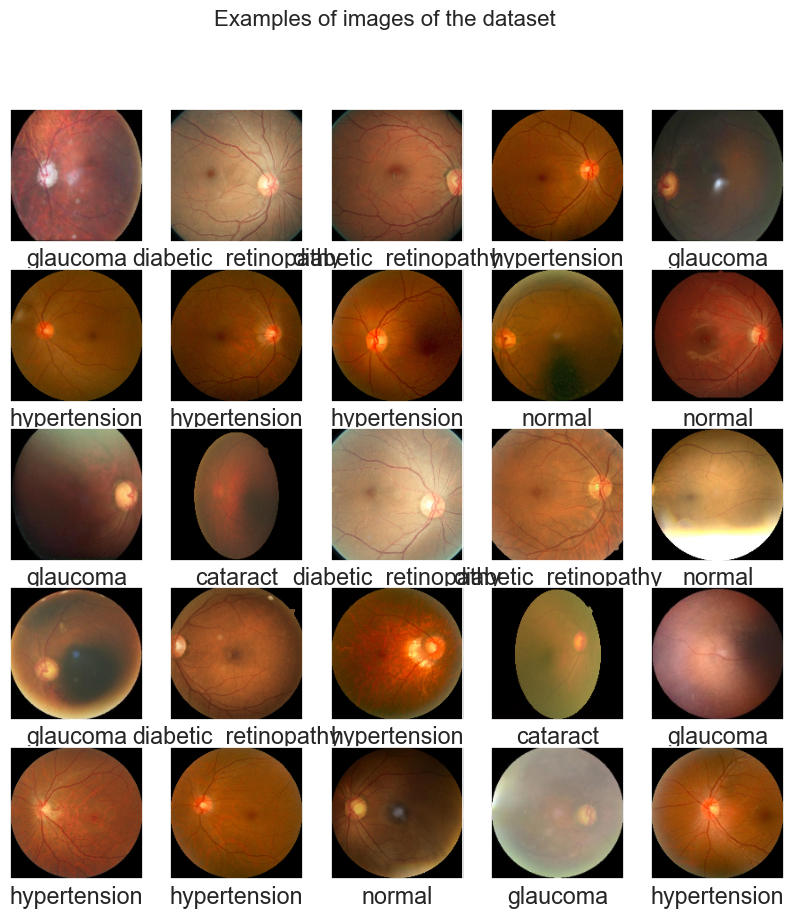

In [16]:
display_examples(class_names, train_images, train_labels)

# CNN

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

C:\Users\shren\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5347 - loss: 1.3279 - val_accuracy: 0.8134 - val_loss: 0.5319
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 981ms/step - accuracy: 0.8285 - loss: 0.4744 - val_accuracy: 0.8708 - val_loss: 0.3808
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 980ms/step - accuracy: 0.8755 - loss: 0.3380 - val_accuracy: 0.8612 - val_loss: 0.4110
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8773 - loss: 0.3242 - val_accuracy: 0.8708 - val_loss: 0.3856
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8894 - loss: 0.2951 - val_accuracy: 0.8612 - val_loss: 0.2978
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9231 - loss: 0.2163 - val_accuracy: 0.8756 - val_loss: 0.2818
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9341 - loss: 0.1847 - val_accuracy: 0.9282 - val_loss: 0.2626
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 989ms/step - accuracy: 0.9449 - loss: 0.1742 - val_accuracy: 0.8947 - val_loss: 0.4078
Epoch 

In [21]:
test_loss = model.evaluate(test_images, test_labels)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9962 - loss: 0.0198


In [22]:
####resnet
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(150,150, 3))

In [23]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(5, activation='softmax')(x)
model2 = Model(ResNet_model.input, output)


model2.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 40, 40,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 38, 38,    │          0 │ conv2_block1_0_c

 Total params: 59,645,957 (227.53 MB)

 Trainable params: 6,833,669 (26.07 MB)

 Non-trainable params: 52,812,288 (201.46 MB)

In [24]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model2.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 98s 12s/step - accuracy: 0.5389 - loss: 1.1657 - val_accuracy: 0.8134 - val_loss: 1.0365
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 81s 12s/step - accuracy: 0.8781 - loss: 0.3355 - val_accuracy: 0.7703 - val_loss: 5.6674
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 71s 10s/step - accuracy: 0.9658 - loss: 0.1204 - val_accuracy: 0.7321 - val_loss: 13.9750
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 71s 10s/step - accuracy: 0.9898 - loss: 0.0270 - val_accuracy: 0.7321 - val_loss: 19.4365
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 72s 10s/step - accuracy: 0.9971 - loss: 0.0103 - val_accuracy: 0.7703 - val_loss: 13.7016


In [26]:
test_loss = model2.evaluate(test_images, test_labels)

33/33 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7631 - loss: 10.1639


In [27]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Define the dimensions of your input images
height = 150
width = 150
channels = 3

# Define the input tensor
input_tensor = Input(shape=(height, width, channels))

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Flatten the output of VGG16
flatten = Flatten()(base_model.output)

# Add a dense layer with some neurons
output = Dense(10, activation='softmax')(flatten)

# Create a new model
model3 = Model(inputs=base_model.input, outputs=output)

# Set all layers as non-trainable initially
for layer in model3.layers:
    layer.trainable = False

# Make the last few layers trainable
for layer in model3.layers[-16:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)


Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten_2' is trainable
Layer 'dense_5' is trainable


In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_disease.h5.keras", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


In [29]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

opt = Adam(learning_rate=0.001)  # Use learning_rate instead of lr
model3.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
model3.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        81,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,796,618 (56.44 MB)

 Trainable params: 14,684,042 (56.02 MB)

 Non-trainable params: 112,576 (439.75 KB)

In [30]:
model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
import tensorflow as tf

# Resize images to match the model's input shape
train_images_resized = tf.image.resize(train_images, (150, 150))

# Now, you can use train_images_resized as input to your model
history = model3.fit(train_images_resized, train_labels, batch_size=128, epochs=5, validation_split=0.2)


Epoch 1/5


C:\Users\shren\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_579']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


7/7 ━━━━━━━━━━━━━━━━━━━━ 105s 14s/step - accuracy: 0.3625 - loss: 29.3988 - val_accuracy: 0.6794 - val_loss: 1.2917
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 99s 14s/step - accuracy: 0.6850 - loss: 1.3301 - val_accuracy: 0.6794 - val_loss: 1.3358
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 98s 14s/step - accuracy: 0.6676 - loss: 1.3104 - val_accuracy: 0.6794 - val_loss: 1.1073
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 97s 14s/step - accuracy: 0.6694 - loss: 1.1241 - val_accuracy: 0.6794 - val_loss: 1.0795
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 99s 14s/step - accuracy: 0.6785 - loss: 1.0860 - val_accuracy: 0.6794 - val_loss: 1.0848


In [32]:
test_loss = model3.evaluate(test_images, test_labels)

33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4561 - loss: 1.6914


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
[0]


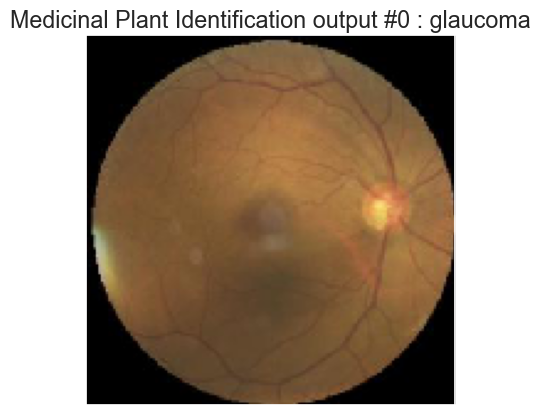

In [34]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"C:\Users\shren\Downloads\retinal imagening-mgit\test\glaucoma\_37_8813329.jpg", target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Medicinal Plant Identification output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

In [35]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r""C:\Users\shren\Downloads\retinal imagening-mgit\test\glaucoma\_38_3483571.jpg"", target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model2.predict(test_image)    
pred_labels = np.argmax(predictions, axis = 1) 
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Medicinal Plant Identification output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4264175411.py, line 5)

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r""C:\Users\shren\Downloads\retinal imagening-mgit\test\glaucoma\_43_2637980.jpg"", target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model3.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Medicinal Plant Identification output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

overall_precision = precision_score(test_labels, pred_labels, average='weighted')
overall_recall = recall_score(test_labels, pred_labels, average='weighted')
overall_f1 = f1_score(test_labels, pred_labels, average='weighted')

# Calculate custom accuracy
custom_accuracy = accuracy_score(test_labels, pred_labels)

print(f'Precision: {overall_precision}')
print(f'Recall: {overall_recall}')
print(f'F1 Score: {overall_f1}')
print(f'Custom Accuracy: {custom_accuracy}')

In [ ]:
# Generate and print classification report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=class_names))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()

In [ ]:
model.save_weights("model_dense.weights.h5")
print("Saved model to disk")

In [ ]:
model_json=model.to_json()
with open("model_dense.json", "w") as json_file:
    json_file.write(model_json)

# CNN-RESNET MODEL-FLASK

In [56]:
model2.save_weights("model_resnet.weights.h5")
print("Saved model to disk")

Saved model to disk


In [57]:
model_json=model2.to_json()
with open("model_resnet.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_resnet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model_vgg.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)

def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = model.predict(preprocessed_image)[0]
    print(prob)

    predicted_label_index = np.argmax(prob)
    label_names =  ['glaucoma',"normal","cataract","diabetic_retinopathy","hypertension"]

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home 1.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home 1.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify 1.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [06/May/2025 08:31:42] "GET / HTTP/1.1" 200 -


uploads\cataract_096.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


127.0.0.1 - - [06/May/2025 08:33:04] "POST /classify HTTP/1.1" 200 -


[1.2417025e-09 1.6888191e-10 1.0000000e+00 5.7160429e-11 4.6003620e-14]


127.0.0.1 - - [06/May/2025 08:33:04] "GET /classify/cataract_096.png HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:33:04] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:33:04] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:33:09] "GET / HTTP/1.1" 200 -


uploads\cataract_097.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


127.0.0.1 - - [06/May/2025 08:36:54] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:36:54] "GET /classify/cataract_097.png HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:36:54] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:36:54] "GET /static/images.jpeg HTTP/1.1" 304 -


[8.3283256e-09 6.3591354e-10 1.0000000e+00 1.4167270e-10 2.8052450e-14]


127.0.0.1 - - [06/May/2025 08:36:58] "GET / HTTP/1.1" 200 -


uploads\_7_5314686.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


127.0.0.1 - - [06/May/2025 08:38:24] "POST /classify HTTP/1.1" 200 -


[9.7471923e-01 1.8807376e-02 2.3794780e-03 2.7972506e-04 3.8142186e-03]


127.0.0.1 - - [06/May/2025 08:38:24] "GET /classify/_7_5314686.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:38:24] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:38:24] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:39:04] "GET / HTTP/1.1" 200 -


uploads\129_left.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


127.0.0.1 - - [06/May/2025 08:39:26] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:39:26] "GET /classify/129_left.jpeg HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:39:26] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:39:26] "GET /static/images.jpeg HTTP/1.1" 304 -


[5.1573135e-10 1.6377605e-08 9.9544862e-15 1.0000000e+00 1.6259181e-15]


127.0.0.1 - - [06/May/2025 08:39:32] "GET / HTTP/1.1" 200 -


uploads\129_right.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


127.0.0.1 - - [06/May/2025 08:39:39] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:39:39] "GET /classify/129_right.jpeg HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:39:39] "

[8.7909298e-09 1.1090228e-08 3.7133633e-14 1.0000000e+00 1.2097787e-15]


GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:39:39] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:39:42] "GET / HTTP/1.1" 200 -


uploads\0009b30e.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[3.3730412e-05 1.5137783e-04 1.0510053e-08 2.7598177e-09 9.9981493e-01]


127.0.0.1 - - [06/May/2025 08:40:29] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:40:29] "GET /classify/0009b30e.png HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:40:29] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:40:29] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:40:49] "GET / HTTP/1.1" 200 -


uploads\0009b30e.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


127.0.0.1 - - [06/May/2025 08:40:57] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:40:57] "GET /classify/0009b30e.png HTTP/1.1" 200 -


[3.3730412e-05 1.5137783e-04 1.0510053e-08 2.7598177e-09 9.9981493e-01]


127.0.0.1 - - [06/May/2025 08:40:57] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:40:57] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:41:31] "GET / HTTP/1.1" 200 -


uploads\8_right.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


127.0.0.1 - - [06/May/2025 08:41:44] "POST /classify HTTP/1.1" 200 -


[7.8558223e-05 9.9296206e-01 8.8752534e-09 9.8123410e-06 6.9495323e-03]


127.0.0.1 - - [06/May/2025 08:41:44] "GET /classify/8_right.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:41:44] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:41:44] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:41:48] "GET / HTTP/1.1" 200 -


uploads\84_right.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


127.0.0.1 - - [06/May/2025 08:41:53] "POST /classify HTTP/1.1" 200 -


[3.522605e-05 9.999013e-01 3.013108e-12 6.336700e-05 4.904976e-08]


127.0.0.1 - - [06/May/2025 08:41:53] "GET /classify/84_right.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:41:53] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:41:53] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:42:36] "GET / HTTP/1.1" 200 -


uploads\8_right.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


127.0.0.1 - - [06/May/2025 08:44:02] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:44:02] "GET /classify/8_right.jpg HTTP/1.1" 200 -


[7.8558223e-05 9.9296206e-01 8.8752534e-09 9.8123410e-06 6.9495323e-03]


127.0.0.1 - - [06/May/2025 08:44:02] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:44:02] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:48:17] "GET / HTTP/1.1" 200 -


uploads\cat.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


127.0.0.1 - - [06/May/2025 08:48:45] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:48:46] "GET /classify/cat.png HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:48:46] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:48:46] "GET /static/images.jpeg HTTP/1.1" 304 -


[8.3283256e-09 6.3591354e-10 1.0000000e+00 1.4167270e-10 2.8052450e-14]


127.0.0.1 - - [06/May/2025 08:50:13] "GET / HTTP/1.1" 200 -


uploads\dr.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


127.0.0.1 - - [06/May/2025 08:50:28] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:50:28] "GET /classify/dr.jpeg HTTP/1.1" 200 -


[5.1573135e-10 1.6377605e-08 9.9544862e-15 1.0000000e+00 1.6259181e-15]


127.0.0.1 - - [06/May/2025 08:50:28] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:50:29] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:51:44] "GET / HTTP/1.1" 200 -


uploads\glauc.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


127.0.0.1 - - [06/May/2025 08:51:55] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:51:55] "GET /classify/glauc.jpg HTTP/1.1" 200 -


[9.7471923e-01 1.8807376e-02 2.3794780e-03 2.7972506e-04 3.8142186e-03]


127.0.0.1 - - [06/May/2025 08:51:55] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:51:55] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:52:48] "GET / HTTP/1.1" 200 -


uploads\ht.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


127.0.0.1 - - [06/May/2025 08:52:58] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 08:52:58] "GET /classify/ht.png HTTP/1.1" 200 -


[3.3730412e-05 1.5137783e-04 1.0510053e-08 2.7598177e-09 9.9981493e-01]


127.0.0.1 - - [06/May/2025 08:52:58] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 08:52:58] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 09:26:24] "GET / HTTP/1.1" 200 -


uploads\cataract_096.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


127.0.0.1 - - [06/May/2025 09:28:30] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 09:28:30] "GET /static/script.js HTTP/1.1" 304 -


[1.2417025e-09 1.6888191e-10 1.0000000e+00 5.7160429e-11 4.6003620e-14]


127.0.0.1 - - [06/May/2025 09:28:30] "GET /classify/cataract_096.png HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 09:28:30] "GET /static/images.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 09:28:48] "GET / HTTP/1.1" 200 -


uploads\Hypertensiveretinopathy.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


127.0.0.1 - - [06/May/2025 09:30:13] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 09:30:14] "GET /classify/Hypertensiveretinopathy.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2025 09:30:14] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [06/May/2025 09:30:14] "GET /static/images.jpeg HTTP/1.1" 304 -


[1.6357005e-06 3.4310513e-05 1.2635032e-09 9.9996400e-01 6.9023431e-10]


127.0.0.1 - - [06/May/2025 09:30:26] "GET / HTTP/1.1" 200 -
